In [28]:
#import packages 
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


## Part 1: Matplotlib 
### 1. Create a line plot comparing total population over time

In [29]:
# Dictionary of Dataframes 
data = {}
data["afg"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-afg--age--gender--year.csv")
data["mmr"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-mmr--age--gender--year.csv")
data["sdn"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-sdn--age--gender--year.csv")
data["ukr"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ukr--age--gender--year.csv")
data["yem"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-yem--age--gender--year.csv")

# Map Abbreviations 
country_name_map = {
    "afg": "Afghanistan",
    "mmr": "Myanmar",
    "sdn": "Sudan",
    "ukr": "Ukraine",
    "yem": "Yemen"
}

# Concatenate all data into a single DataFrame
df = pd.concat([data["afg"], data["mmr"], data["sdn"], data["ukr"], data["yem"]], ignore_index=True)


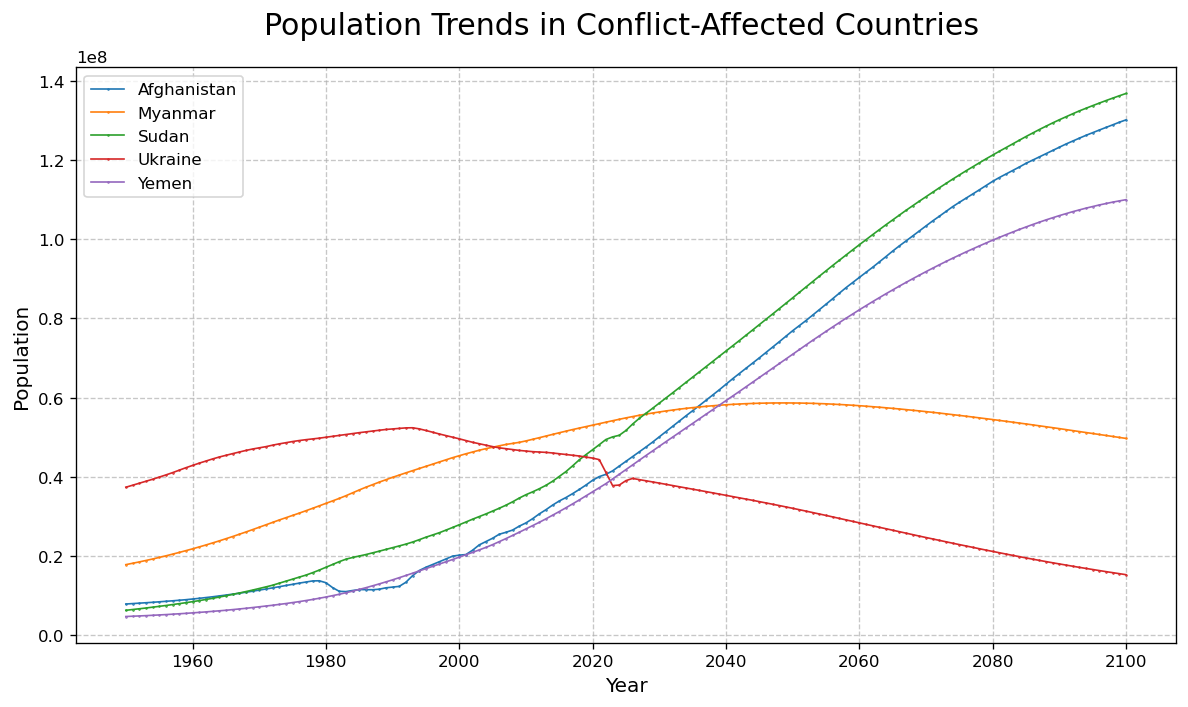

In [30]:
# Aggregate country populations
population_country_year = df.groupby(['country','year'])['population'].sum().reset_index()

# Create figure and axis 
plt.figure(figsize=(10,6),dpi=120)

# Create line plot 
for country in population_country_year['country'].unique():
    country_data = population_country_year[population_country_year['country'] == country]
    plt.plot(
        country_data['year'],
        country_data['population'],
        marker='o', 
        linestyle= '-' , 
        linewidth=1,
        markersize=0.5,
        label=country_name_map[country])

# Customize the plot
plt.title('Population Trends in Conflict-Affected Countries ', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


### 2. Investigate demographic shifts using a stacked bar chart

/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_82547/2262239573.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=True)
/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_82547/2262239573.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['year', 'age_group'])['population'].sum().unstack().fillna(0)


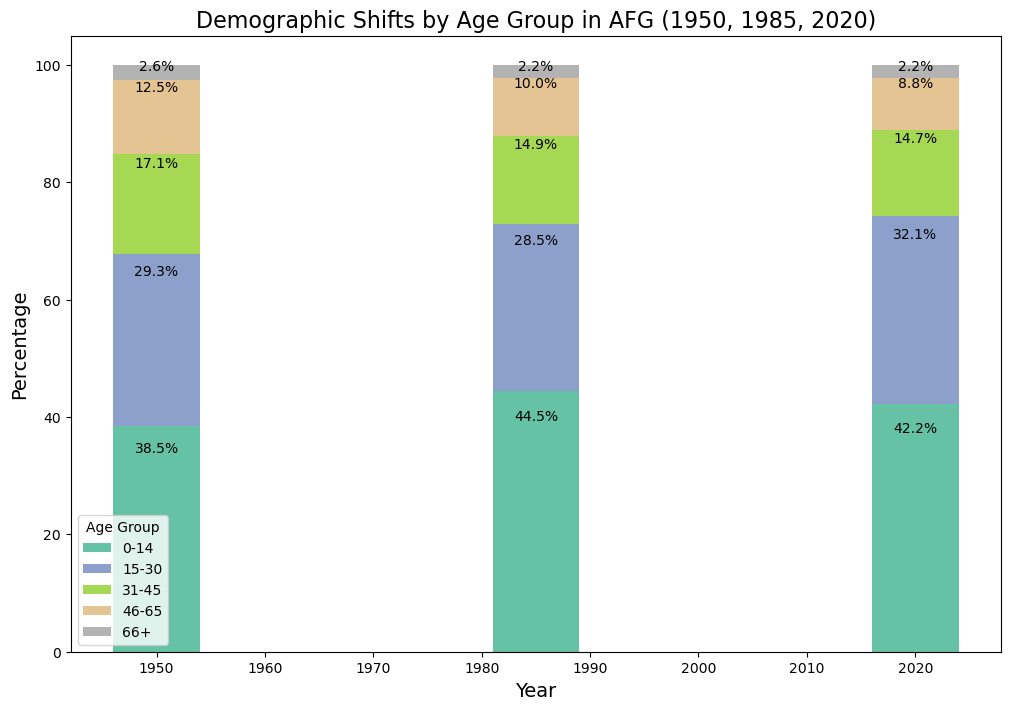

In [31]:
# Concatenate all data into a single DataFrame
df = pd.concat(data.values(), ignore_index=True)

# Select one country to focus on (e.g., Afghanistan)
country_of_interest = 'afg'
df_country = df[df['country'] == country_of_interest]

# Define age bins and corresponding labels
age_bins = [0, 14, 30, 45, 65, 150]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

# Filter data by the years of interest: 1950, 1985, and 2020
years_of_interest = [1950, 1985, 2020]
df_filtered = df_country[df_country['year'].isin(years_of_interest)]

# Create an 'age_group' column by binning the 'age' column
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=True)

# Group data by year and age group, summing the population for each group
grouped_data = df_filtered.groupby(['year', 'age_group'])['population'].sum().unstack().fillna(0)

# Calculate percentage for each age group within each year
grouped_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot with Set2 colormap
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Set2(np.linspace(0, 1, len(age_labels)))
bar_width = 8.0  

# Plot each age group as a stacked bar
bottom = np.zeros(len(grouped_percentage))
for idx, age_group in enumerate(grouped_percentage.columns):
    ax.bar(grouped_percentage.index, grouped_percentage[age_group], 
           width=bar_width, bottom=bottom, color=colors[idx], label=age_group)
    bottom += grouped_percentage[age_group]

# Add annotations for percentages above the bars
for year_idx, row in grouped_percentage.iterrows():
    cumulative = 0
    for age_group, value in row.items():
        if value > 0:  
            ax.text(year_idx, cumulative + value - (value * 0.1), 
                    f'{value:.1f}%', ha='center', va='center', fontsize=10, color='black')
        cumulative += value

# Set labels, title, and legend
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title(f'Demographic Shifts by Age Group in {country_of_interest.upper()} (1950, 1985, 2020)', fontsize=16)
ax.legend(title='Age Group')

# Display the plot
plt.show()


## Part 2: Seaborn 
### 1. Create a heatmap showing population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.



/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_82547/534695974.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_year['age_group'] = pd.cut(
/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_82547/534695974.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered_year.groupby(['country', 'age_group'])['population'].sum().reset_index()
/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_82547/534695974.py:41: FutureWarning: The default value of observed=False is deprecated and will change to obse

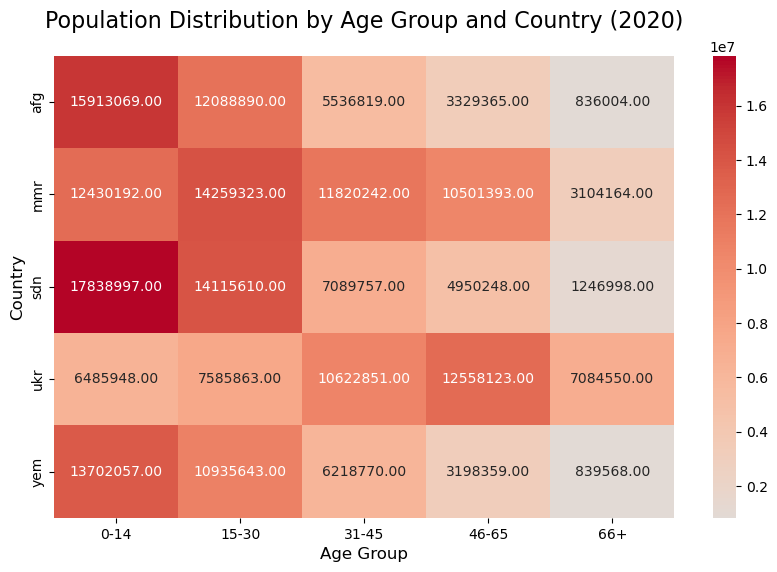

In [48]:

# Dictionary of DataFrames
data = {}
data["afg"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-afg--age--gender--year.csv")
data["mmr"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-mmr--age--gender--year.csv")
data["sdn"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-sdn--age--gender--year.csv")
data["ukr"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ukr--age--gender--year.csv")
data["yem"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-yem--age--gender--year.csv")

# Map Abbreviations to Full Country Names
country_name_map = {
    "afg": "Afghanistan",
    "mmr": "Myanmar",
    "sdn": "Sudan",
    "ukr": "Ukraine",
    "yem": "Yemen"
}

# Concatenate all DataFrames into a Single DataFrame
df = pd.concat(data.values(), ignore_index=True)

# Filter the Data for the Year of Interest
year = 2020
df_filtered_year = df[df['year'] == year]

# Define Age Bins and Corresponding Labels
age_bins = [0, 14, 30, 45, 65, 150]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

# Create an 'age_group' Column Using pd.cut()
df_filtered_year['age_group'] = pd.cut(
    df_filtered_year['age'], 
    bins=age_bins, 
    labels=age_labels, 
    right=True
)

# Group Data by Country and Age Group, Summing the Population
df_grouped = df_filtered_year.groupby(['country', 'age_group'])['population'].sum().reset_index()

# Reshape Data for the Heatmap 
heatmap_data = df_grouped.pivot_table(
    values='population', 
    index='country', 
    columns='age_group', 
    aggfunc='sum',
    fill_value=0  
)

# Plot the Heatmap 
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt='.2f'
)
ax.set_title('Population Distribution by Age Group and Country (2020)', fontsize=16, pad=20)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
plt.show()


**This heatmap reveals a higher proportiono of youth (age 0-14) in Sudan, Afghanistan, and Yemen. The middle age group is more prominent in Ukraine and Myanmar. The elderly population (age 66+) is relatively small compared to the other age popualtions in each country.**


### 2.Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.

/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_82547/2301955640.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['gender'] = df_2020['gender'].replace({1: 'Male', 2: 'Female'})


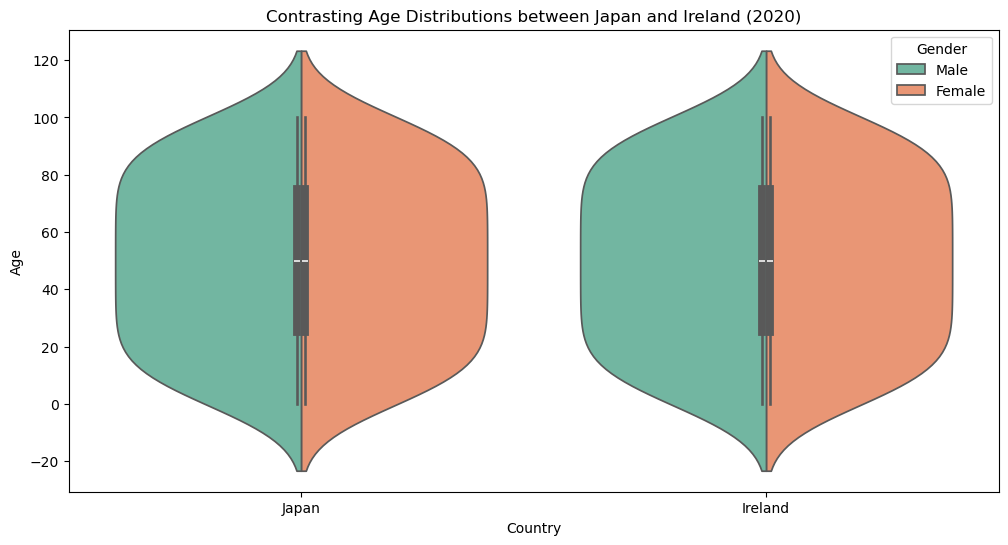

In [49]:
# Dictionary of Data frames
data = {}
data["jpn"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv")
data["irl"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-irl--age--gender--year.csv")


# Map Abbreviations 
country_name_map = {
    "jpn": "Japan",
    "irl": "Ireland",
}

# Add a new column with country names using abbreviations map
for key in data:
    data[key]["Country"] = country_name_map[key]

# Concatenate all data into a single DataFrame
df = pd.concat([data["jpn"], data["irl"]],ignore_index=True)


# Filter data by 2020
df_2020 = df[df["year"] == 2020]

# Map Gender values
df_2020['gender'] = df_2020['gender'].replace({1: 'Male', 2: 'Female'})


# Violin Plot 
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_2020,
    x="Country",
    y="age",
    hue="gender",
    split=True,  
    palette="Set2"
)
plt.title("Contrasting Age Distributions between Japan and Ireland (2020)")
plt.xlabel("Country")
plt.ylabel("Age")
plt.legend(title="Gender")

# Show the plot
plt.show()


**This heat map demonstrates the age distribution across men and women in Japan and Irelend. Both countries show practically identical distributions which may because this data is an estimate and not real data.**

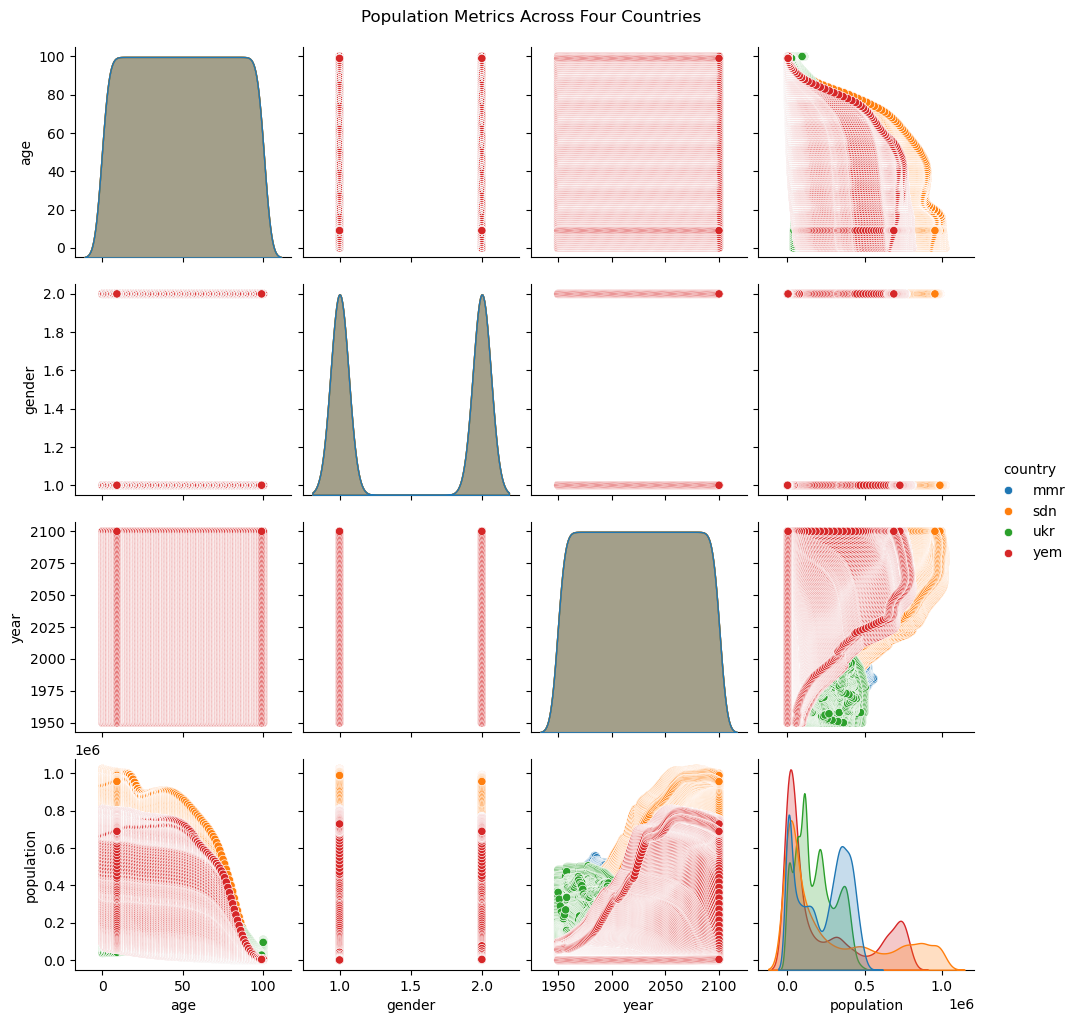

In [50]:
# Dictionary of Dataframes 
data = {}
data["mmr"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-mmr--age--gender--year.csv")
data["sdn"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-sdn--age--gender--year.csv")
data["ukr"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ukr--age--gender--year.csv")
data["yem"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-yem--age--gender--year.csv")

# Map Abbreviations 
country_name_map = {
    "mmr": "Myanmar",
    "sdn": "Sudan",
    "ukr": "Ukraine",
    "yem": "Yemen"
}

# Concatenate all data into a single DataFrame
df = pd.concat([data["mmr"], data["sdn"], data["ukr"], data["yem"]], ignore_index=True)

# Pairplot 
sns.pairplot(df, hue="country", diag_kind="kde")
plt.suptitle("Population Metrics Across Four Countries ", y=1.02)

# Show the plot
plt.show()

**The pairplot shows the distribution of age to be uniform across all countries. Population size shows varience where Myanmar and Yemen have higher density at lower population values. Gender distribution is normally distrubuted in all countries. 
